# <center> **PREVISIONS DES SERIES TEMPORELLES AVEC FACEBOOK PROPHET EN MOINS DE 10 MINUTES**

<center>Par Josué AFOUDA

# <font color=red> Problématique

* **Les besoins en prévision sont de plus en plus forts (Business, Recherche, Gouvernance, etc.)** ;

* **Les algoritmes existant sont pour la plupart difficile à prendre en main, surtout pour des non-spécialistes, et répondent à un type précis de série temporelle** ;

* **La modélisation de séries temporelles prend beaucoup de temps, ce qui constitue un manque à gagner en Entreprises (*Time is money*)**.

Dès lors, il y a nécessité de trouver un outil qui peut résoudre tous ces problèmes rencontrés dans la modélisation des séries temporelles.

# <font color=red> Facebook Prophet

«Prophet» est un outil open-source créé en 2017 par Facebook, disponible sur R et Python, qui aide les utilisateurs à analyser et prévoir les valeurs de séries chronologiques. 

Grâce aux efforts considérables de ses développeurs, Prophet rend conviviale la modélisation de séries temporelles même pour les non-experts. L'outil est aussi très personnalisable avec plusieurs fonctionnalités permettant de prendre en compte des situations particulières.

Voici quelques qualités de Facebook Prophet :

* **Robuste**, **Précis** et **Rapide** : Prophet permet la modélisation de séries temporelles à grande échelle ;

* **Fiable** : des grandes entreprises comme Facebook mondiales l'utilisent pour leurs besoins de prévision ;

* **Complètement automatique** : avec Prophet, vous pouvez même travailler avec des données présentant des valeurs manquantes. Plus besoin d'une phase intensive de nettoyage des données ;

* **Très personnalisable** : il permet ainsi d'intégrer dans votre modélisation, votre connaissance du domaine ;

* **Disponible sous R et Python** qui sont parmi les langages les plus utilisés en Science des Données.

# <font color=red> Importation des librairies et des données

In [1]:
# Importation de pandas, DataReader, fbprophet et plotly.express

import pandas as pd

from pandas_datareader.data import DataReader

from fbprophet import Prophet

import plotly.express as px

Nous utiliserons les prix de clôture de l'indice S&P500 de fin 1999 à fin 2020.

L'objectifs est de **prévoir les futurs prix pour l'année 2021 (horizon de 365 jours)**.

In [2]:
# Importation des données

df = DataReader('^GSPC', 'yahoo', start = '1999-12-31')[['Close']]

df

,Close
Date,
1999-12-31,1469.250000
2000-01-03,1455.219971
2000-01-04,1399.420044
2000-01-05,1402.109985
2000-01-06,1403.449951
...,...
2020-12-24,3703.060059
2020-12-28,3735.360107
2020-12-29,3727.040039


In [3]:
# Création d'une colonne 'Dates'

df['Dates'] = df.index

# <font color=red> Visualisation des données

In [5]:
# Evolutiondu prix au cours du temps

px.area(x = 'Dates', y = 'Close', data_frame=df)

In [6]:
# Boîte à moustache

px.box(y = 'Close', data_frame=df)

In [7]:
# Histogramme

px.histogram(df['Dates'], df['Close'])

# <font color=red> Préparation des données

La seule chose recquise pour appliquer Prophet à vos données est que la variable indiqant le temps soit nommée ***ds*** et que la vraible indiquant votre série temporelle soit nommée ***y***.

In [9]:
# Renommer les colonnes

prophet_df = df.rename(columns = {'Dates':'ds', 'Close':'y'})

prophet_df

,y,ds
Date,,
1999-12-31,1469.250000,1999-12-31
2000-01-03,1455.219971,2000-01-03
2000-01-04,1399.420044,2000-01-04
2000-01-05,1402.109985,2000-01-05
2000-01-06,1403.449951,2000-01-06
...,...,...
2020-12-24,3703.060059,2020-12-24
2020-12-28,3735.360107,2020-12-28
2020-12-29,3727.040039,2020-12-29


# <font color=red> Modélisation

In [10]:
# Initialisation de l'algorithme

m = Prophet()

# Entraînement de l'algorithme

m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# <font color=red> Prévisions

In [11]:
# Dataframe des prévisions

future = m.make_future_dataframe(periods=365)
future

,ds
0,1999-12-31
1,2000-01-03
2,2000-01-04
3,2000-01-05
4,2000-01-06
...,...
5645,2021-12-27
5646,2021-12-28
5647,2021-12-29
5648,2021-12-30


In [12]:
# Prévisions des prix de clôture

forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1999-12-31,1468.773199,1365.789148,1593.987968,1468.773199,1468.773199,11.568515,11.568515,11.568515,0.602912,0.602912,0.602912,10.965603,10.965603,10.965603,0.0,0.0,0.0,1480.341714
1,2000-01-03,1468.092539,1354.707778,1585.185459,1468.092539,1468.092539,10.283019,10.283019,10.283019,0.530914,0.530914,0.530914,9.752105,9.752105,9.752105,0.0,0.0,0.0,1478.375558
2,2000-01-04,1467.865652,1361.364618,1583.196035,1467.865652,1467.865652,11.436740,11.436740,11.436740,2.073933,2.073933,2.073933,9.362807,9.362807,9.362807,0.0,0.0,0.0,1479.302392
3,2000-01-05,1467.638765,1366.009883,1591.346057,1467.638765,1467.638765,10.425058,10.425058,10.425058,1.449691,1.449691,1.449691,8.975367,8.975367,8.975367,0.0,0.0,0.0,1478.063823
4,2000-01-06,1467.411878,1358.708341,1589.833110,1467.411878,1467.411878,10.527616,10.527616,10.527616,1.942128,1.942128,1.942128,8.585487,8.585487,8.585487,0.0,0.0,0.0,1477.939494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,2021-12-27,3627.041116,3477.313644,3812.191046,3496.015552,3746.160714,13.044513,13.044513,13.044513,0.530914,0.530914,0.530914,12.513599,12.513599,12.513599,0.0,0.0,0.0,3640.085629
5646,2021-12-28,3627.779002,3456.841383,3810.235413,3496.322424,3747.287238,14.130859,14.130859,14.130859,2.073933,2.073933,2.073933,12.056926,12.056926,12.056926,0.0,0.0,0.0,3641.909861
5647,2021-12-29,3628.516888,3464.482890,3811.010221,3496.629296,3748.413762,13.060800,13.060800,13.060800,1.449691,1.449691,1.449691,11.611110,11.611110,11.611110,0.0,0.0,0.0,3641.577688
5648,2021-12-30,3629.254774,3457.066491,3800.507702,3496.885952,3749.681908,13.119728,13.119728,13.119728,1.942128,1.942128,1.942128,11.177600,11.177600,11.177600,0.0,0.0,0.0,3642.374502


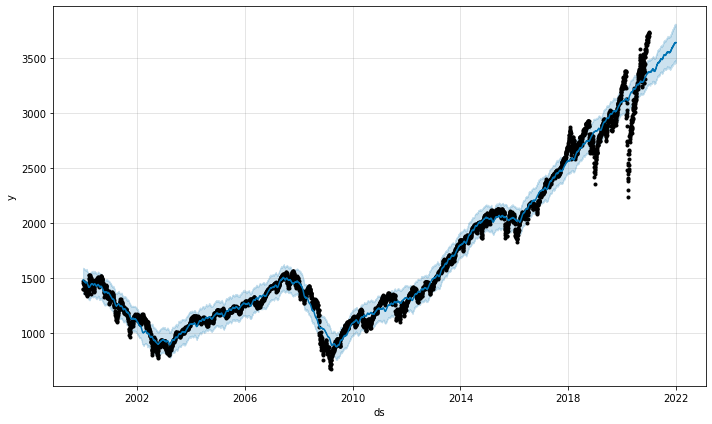

In [13]:
# Visualisation des résultats

fig1 = m.plot(forecast)

La courbe en bleue est pour les valeurs prédites ; celle en noire pour les valeurs observées et on a aussi l'intervalle de confiance.

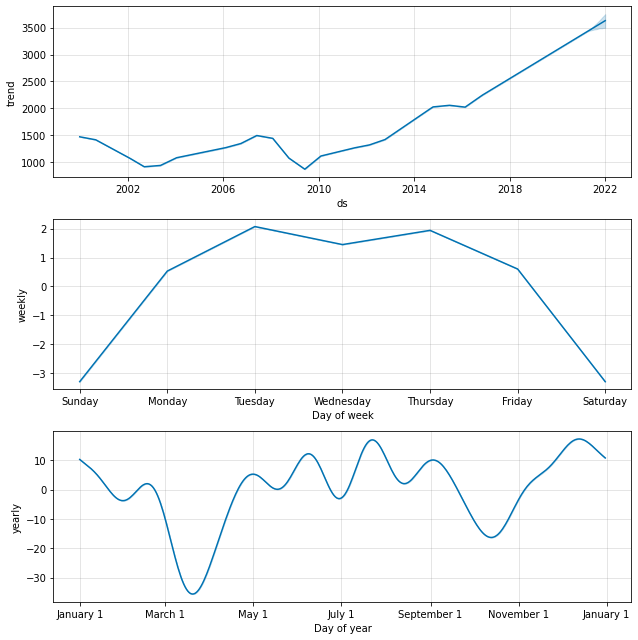

In [14]:
# Composants

fig2 = m.plot_components(forecast)